<a href="https://colab.research.google.com/github/Heliwrenaid/ML-network-embeddings/blob/js-dev/Embedding_alg_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%cd drive/MyDrive/GraphEmbedding-master
!python setup.py install
%cd examples
!python "./setup.py" install
!python deepwalk_wiki.py
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
# Jakby nie działało to odkomentuje poniższe, odpal i uruchom ponownie środowisko wykonawcze i znowu odpal
#!pip install ge

import ge

In [2]:
%%capture
# GENERAL
import numpy as np
print(np.__version__)
from ge.classify import read_node_label, Classifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import time

# ALGORITHMS 
from ge import DeepWalk
from ge import LINE
from ge import Node2Vec
from ge import SDNE
from ge import Struc2Vec

height = []
bars = []

In [63]:
import csv
from __future__ import print_function

def write_embeddings(filename="FILENAME.txt"):
  
  f = open(filename, 'w')
  writer = csv.writer(f,delimiter=' ')

  M = []
  for key,values in embeddings.items():
    L = []
    L.append(key)
    for value in values:
      L.append(value)
    M.append(L)

  strig = ''

  for m in M:
    writer.writerow(m)

  f.close()

In [70]:
from sklearn.manifold import TSNE
def makeTsneAndPrint(filename="hejeczka.txt",algorithm="embedding Algo"):
  # extracting data without id's
  File_data = np.genfromtxt(filename, dtype=float,invalid_raise = False,usecols=np.arange(1, 65))

  # extracting id's from source file
  as_labels = np.genfromtxt(filename, dtype=float,invalid_raise = False,usecols=np.arange(0, 1))

  # making embeddings 
  embedding = TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(File_data)

  # plot limiting
  plt.figure(figsize=(10,10))
  plt.xlim(embedding[:,0].min()-2,embedding[:,0].max() + 2)
  plt.ylim(embedding[:,1].min()-2,embedding[:,1].max() + 2)

  # assigning numbers to points in plot 
  for i in range(len(embedding)):
    plt.text(embedding[i,0],embedding[i,1],str(as_labels[i]),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center",bbox = dict(boxstyle=f"circle,pad={0.25}", fc="lightgrey"))

  title = "Autonomous Systems Embeddings for: " + str(algorithm)
    # plotting
  plt.xlabel(' t-SNE 1st coordinate',fontweight="bold")
  plt.ylabel(' t-SNE 2nd coordinate', fontweight="bold")
  plt.title(title ,fontweight="bold")
  plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s finished


Learning embedding vectors...
Learning embedding vectors done!


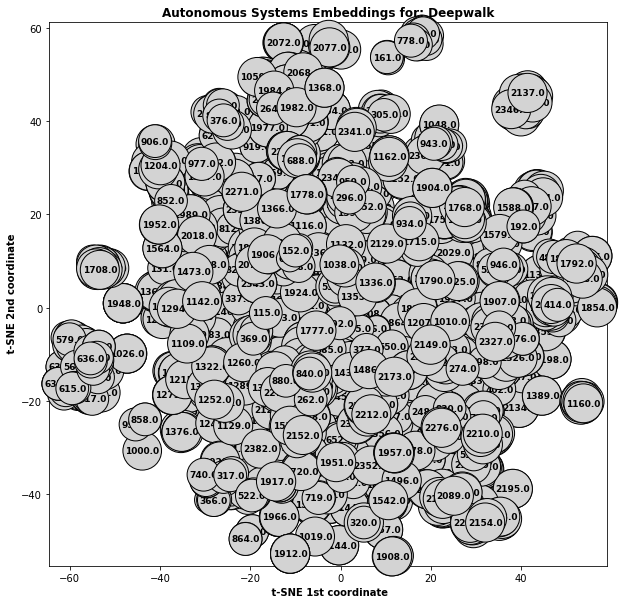

In [72]:
start = time.time()

G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])# Read graph
model = DeepWalk(G,walk_length=10,num_walks=80,workers=1)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Deepwalk")
write_embeddings("Deepwalk.txt")
makeTsneAndPrint("Deepwalk.txt","Deepwalk")

Epoch 1/50
97/97 - 2s - loss: 0.6931
Epoch 2/50
97/97 - 1s - loss: 0.6914
Epoch 3/50
97/97 - 2s - loss: 0.6806
Epoch 4/50
97/97 - 2s - loss: 0.6225
Epoch 5/50
97/97 - 1s - loss: 0.5043
Epoch 6/50
97/97 - 1s - loss: 0.4169
Epoch 7/50
97/97 - 1s - loss: 0.3846
Epoch 8/50
97/97 - 1s - loss: 0.3468
Epoch 9/50
97/97 - 1s - loss: 0.3200
Epoch 10/50
97/97 - 1s - loss: 0.2967
Epoch 11/50
97/97 - 1s - loss: 0.2719
Epoch 12/50
97/97 - 1s - loss: 0.2498
Epoch 13/50
97/97 - 1s - loss: 0.2369
Epoch 14/50
97/97 - 1s - loss: 0.2103
Epoch 15/50
97/97 - 1s - loss: 0.1929
Epoch 16/50
97/97 - 1s - loss: 0.1792
Epoch 17/50
97/97 - 1s - loss: 0.1650
Epoch 18/50
97/97 - 1s - loss: 0.1524
Epoch 19/50
97/97 - 1s - loss: 0.1461
Epoch 20/50
97/97 - 1s - loss: 0.1306
Epoch 21/50
97/97 - 1s - loss: 0.1241
Epoch 22/50
97/97 - 1s - loss: 0.1151
Epoch 23/50
97/97 - 1s - loss: 0.1087
Epoch 24/50
97/97 - 1s - loss: 0.1028
Epoch 25/50
97/97 - 1s - loss: 0.0987
Epoch 26/50
97/97 - 1s - loss: 0.0925
Epoch 27/50
97/97 - 1

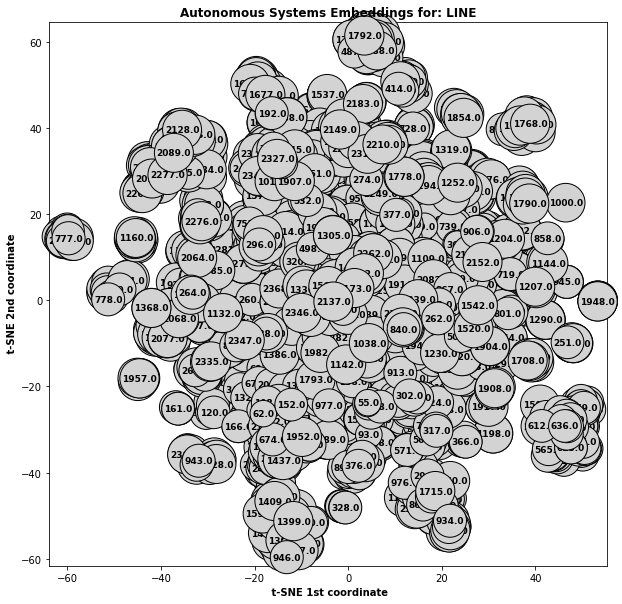

In [73]:
start = time.time()

G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = LINE(G,embedding_size=128,order='second') #init model,order can be ['first','second','all']
model.train(batch_size=1024,epochs=50,verbose=2)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("LINE")
write_embeddings("LINE.txt")
makeTsneAndPrint("LINE.txt","LINE")

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s finished


Learning embedding vectors...
Learning embedding vectors done!


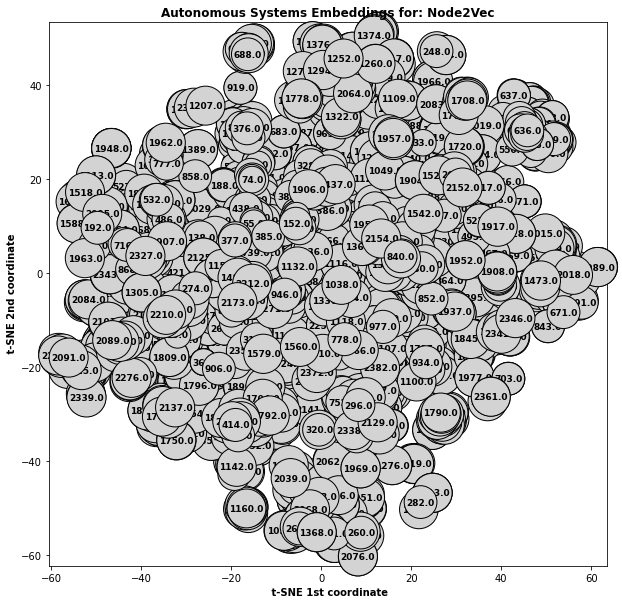

In [74]:
start = time.time()
G=nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                        create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])#read graph

model = Node2Vec(G, walk_length = 10, num_walks = 80,p = 0.25, q = 4, workers = 1)#init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors
end = time.time()

height.append(end - start)
bars.append("Node2Vec")
write_embeddings("Node2Vec.txt")
makeTsneAndPrint("Node2Vec.txt","Node2Vec")

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  5.7min remaining:  5.7min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  5.8min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   50.3s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.9min finished


Learning representation...
Learning representation done!


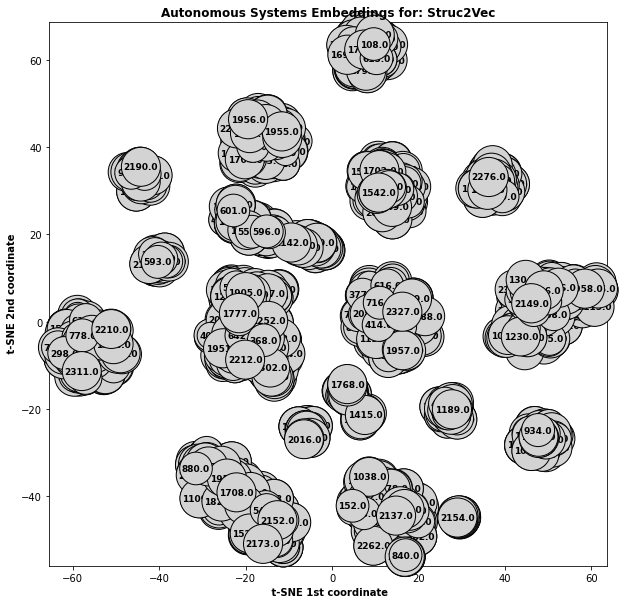

In [76]:
start = time.time()
G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = model = Struc2Vec(G, 10, 80, workers=4, verbose=40, ) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Struc2Vec")
write_embeddings("Struc2Vec.txt")
makeTsneAndPrint("Struc2Vec.txt","Struc2Vec")

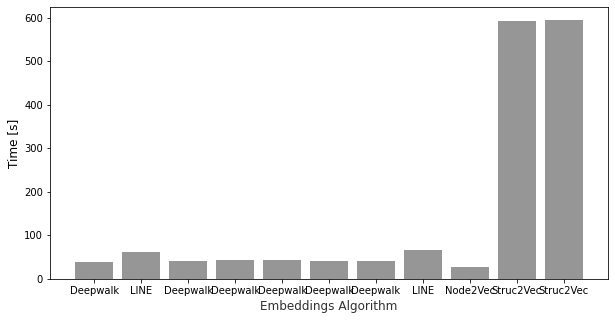

In [77]:
# Make a dataset:
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, height, color = '#969696')
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Embeddings Algorithm', fontsize=12, color='#323232')
plt.ylabel('Time [s]', fontsize=12)

plt.show()